In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_covariate_shift_sims/version0/varying_heritability_n/seed331/results.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head(20)

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,include_raw,model,fi,splitting_strategy,fi_time,MSE_before_ablation,MSE_after_ablation_1,MSE_after_ablation_2,MSE_after_ablation_3,MSE_after_ablation_4,MSE_after_ablation_5,MSE_after_ablation_6,MSE_after_ablation_7,MSE_after_ablation_8,MSE_after_ablation_9,MSE_after_ablation_10,ablation_time,split_seed,index,var,true_support,cor_with_signal
0,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,0,1.0,NaN
1,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,1,1.0,NaN
2,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,2,1.0,NaN
3,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,3,1.0,NaN
4,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,4,1.0,NaN
5,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,5,0.0,0.124708
6,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,6,0.0,0.239640
7,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,7,0.0,0.282061
8,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,8,0.0,0.289128
9,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,LFI_absolute_sum,train-test,0.740310,5155.105687,5249.403428,5215.713052,5173.884142,5027.133118,5162.216813,5539.567319,5755.178502,5825.922300,5746.017239,5792.086783,0.054013,331,0,9,0.0,0.228974


In [4]:
# methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
#            "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
#            "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
#            "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]

methods = ["MDI_all_stumps", "MDI_all_stumps_without_raw","LFI_absolute_sum","LFI_absolute_sum_without_raw","TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
num_features = 10
results = {}
for h in heritability:
    results[h] = {}
    for s in sample_row_n:
        results[h][s] = {}
        for m in methods:
            results[h][s][m] = {}
            for r in range(nreps+1):
                results[h][s][m][r] = []

In [5]:
for h in heritability:
    for s in sample_row_n:
        for m in methods:
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["MSE_before_ablation"].unique()) == 1
                results[h][s][m][r].append(df_sub["MSE_before_ablation"].unique()[0])
                for i in range(num_features):
                    assert len(df_sub[f"MSE_after_ablation_{i+1}"].unique()) == 1
                    results[h][s][m][r].append(df_sub[f"MSE_after_ablation_{i+1}"].unique()[0])

In [8]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for s in sample_row_n:
        agg_results[h][s] = {}
        for m in methods:
            agg_results[h][s][m] = None

In [10]:
for h in heritability:
    for s in sample_row_n:
        for m in methods:
            result = []
            for f in range(num_features+1):
                result.append(np.mean([results[h][s][m][r][f] for r in range(nreps+1)]))          
            agg_results[h][s][m] = result

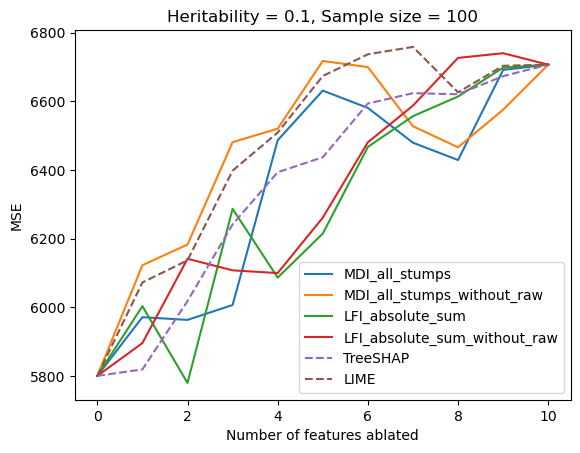

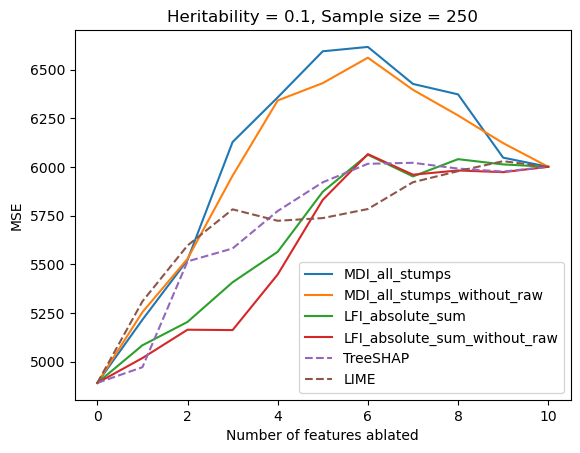

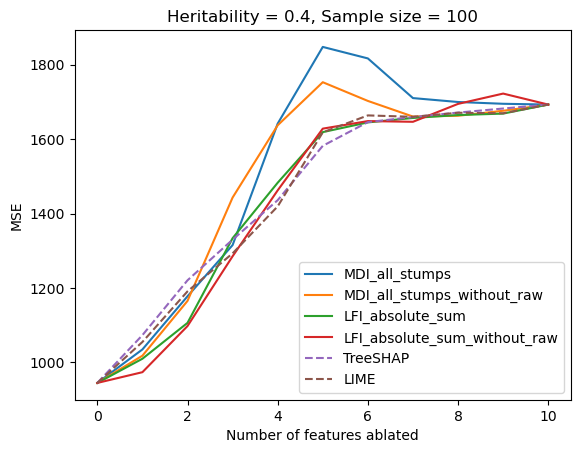

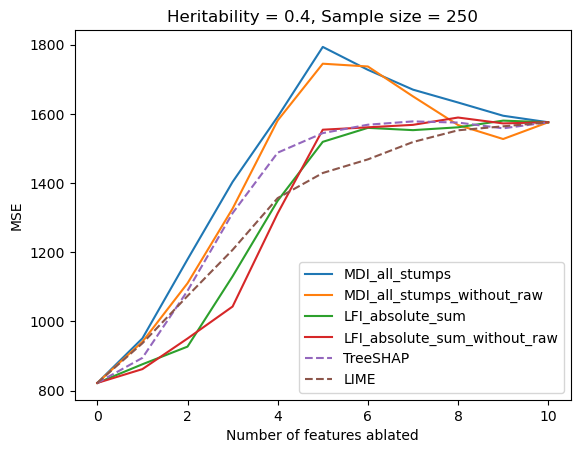

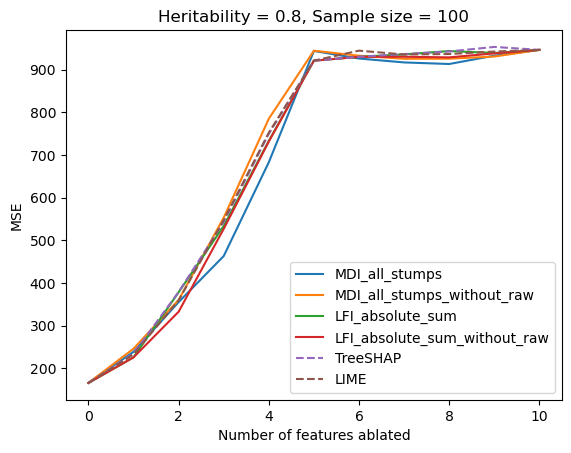

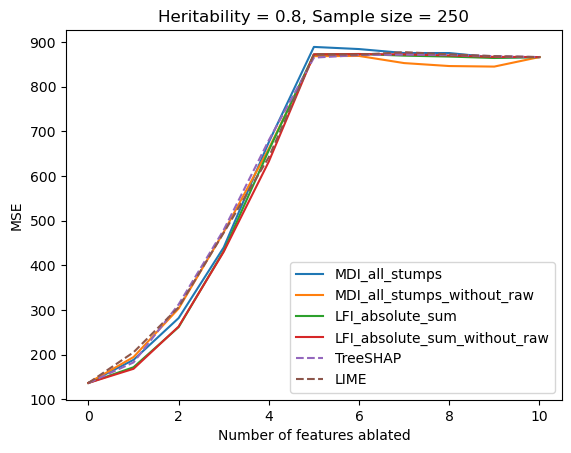

In [13]:
# Plotting
for i in range(len(heritability)):
    h = heritability[i]
    for j in range(len(sample_row_n)):
        s = sample_row_n[j]
        fig, ax = plt.subplots()
        for m in methods:
            if m in ["TreeSHAP", "LIME"]:
                ax.plot(range(num_features+1), agg_results[h][s][m], label=m, linestyle='dashed')
            else:
                ax.plot(range(num_features+1), agg_results[h][s][m], label=m)
        ax.set(xlabel='Number of features ablated', ylabel='MSE',
               title=f'Heritability = {h}, Sample size = {s}')
        ax.legend()
        plt.show()